# Exploring billboard data

At a minimum, you must:

Use Pandas to read in your data

Rename column names where appropriate

Describe your data: check the value counts and descriptive statistics

Make use of groupby statements

Utilize Boolean sorting

Assess the validity of your data (missing data, distributions?)


At a maximum, you should strive to:

Produce a blog-post ready description of your lab

State your assumptions about the data

Describe limitations

Consider how you can action this from a stakeholder perspective (radio, record label, fan) (We haven't covered
stakeholder analysis yet)

Include visualization

In [2]:
import pandas as pd

df = pd.read_csv('assets/billboard.csv')
# Let's take a look at our data
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Right off the bat, I am concerned about the column names. The '.' character will potentially be problematic when trying to call column names. Let's replace the '.' with a '_' character instead.

In [3]:
df.columns  =[col.replace('.','_') for col in df.columns]
df.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x67th_week,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Much better!

Now let's start looking at the data itself. We can already see there are going to be a considerable amount of NaN in this data set, but that may be okay. I'm not sure if there is a better way to represent a song no longer being on the billboard chart than having an empty cell there. Let's take a closer look and find out.

In [101]:
df.describe()

,year,x1st_week,x2nd_week,x3rd_week,x4th_week,x5th_week,x6th_week,x7th_week,x8th_week,x9th_week,...,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week,weeks_on_chart
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.000000
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.741325
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.083785
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000


Well that is interesting... the last 10 columns don't appear to have any data points at all?! How many of these empty columsn are there? Let's look a little closer.

Let's try to select all columns were there is not a single data point.

In [5]:
df.count().sort_values(ascending=True).head(15)

x76th_week    0
x66th_week    0
x67th_week    0
x68th_week    0
x69th_week    0
x75th_week    0
x71st_week    0
x72nd_week    0
x73rd_week    0
x74th_week    0
x70th_week    0
x65th_week    1
x54th_week    2
x56th_week    2
x57th_week    2
dtype: int64

This is beginning to make sense. The dataset has the weeks a song was on the billboard chart for, no songs made it  past week 70. It may make sense for us to just remove these columns from the dataset, but they aren't causing any harm at the moment.

I see one song that made it to week 65. I wonder what song that was... let's keep exploring our data and maybe we'll find out.

In [100]:
# Let's start by creating a new column that will help encapsolate some interesting information for us. We can call
# it weeks_on_chart.

# First we can grab a data frame of just the weeks to make things a little easier to work with.

df_weeks = df[list(filter(lambda x: x.startswith('x'), df.columns))].transpose()

# We can now transpose the dataframe and count. The index should still match our original dataframe, so we can
# tack it on with a new name.
df['weeks_on_chart'] = [int(c) for c in df_weeks.count()] # I also need to convert the counts to ints

#Let's sort our dataframe and look at what the longest running song was
top_5 = df.sort_values('weeks_on_chart', ascending=False).head()
top_5.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week,weeks_on_chart
46,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,81,77.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
24,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
17,2000,"Hill, Faith",Breathe,4:04,Rap,1999-11-06,2000-04-22,81,68.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
13,2000,Creed,With Arms Wide Open,3:52,Rock,2000-05-13,2000-11-11,84,78.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47


Let's take a look the runs of these songs

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

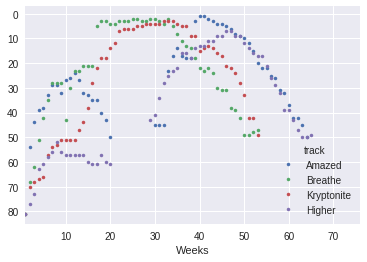

In [103]:
#df_weeks.index = ['Week ' + str(s) for s in (range(1, len(df_weeks) + 1))]
df_weeks.index = range(1, len(df_weeks) + 1)
df_weeks.index.name = 'Weeks'
df_weeks.columns = df['track']
df_weeks[df[df.weeks_on_chart >50].track].plot(style='.')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

Well this is a somewhat deceptive graphic. The x axis is a different date for each song. This is what there respective runs looked like over time. It would be nice to converet the x axis to a time series and plot this again. I have made a blog post that covers this process. You can see the code in the other jupyter notebook I used to work through the blog post in this git repo.

Also, I wonder what happened between the weeks of 20-30 for both 'Amazed' and 'Higher'. There seems to be a gap in the data. This is something I can investigate further.

Opening the data in a CSV viewer like excels reveals that a considerable amount of data from in the columns for weeks 20 to 30 have missing values. Not just NaN values, but no input at all. This tells me the dataset must be corrupted. For those weeks. I could go through and investigate this data further and try to infer what the missing values for a song should be based on what there position was on the chart the weeks before and after and what positions are missing for the chart in general for that specific week in time (week 20 for one song is week 19 for another). But in the interest of time I'm going to forgo that effort and do my additional analysis with this information in mind.